# Mission 2. Abengers

In [1]:
# Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
chars = pd.read_csv('C:/Users/HP/Desktop/work_on_PG/charcters_stats.csv')

In [25]:
chars.tail(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292
610,Zoom,bad,50,10,100,28,72,28,288


In [6]:
# 결측치 검토
chars.isna().sum()

Name            0
Alignment       3
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
dtype: int64

## 공통사항

시각화 작업에서 alignment별로 나눠서 진행해야 하는 상황이 많은데, alignment에 결측치가 존재하면 곤란하다. 편을 줘야하니까.

In [7]:
chars.Alignment.unique()

array(['good', 'bad', nan, 'neutral'], dtype=object)

In [8]:
chars.loc[chars.Alignment.isna()]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
28,Anti-Venom,NaN,75,60,65,90,85,84,459
98,Blackwulf,NaN,50,28,8,30,59,25,200
560,Trickster,NaN,1,1,1,1,0,1,5


검색찬스 결과, 딱히 어떤 Alignment가 나오진 않은거 같다. 따라서 얘네들의 Alignment 값을 neutral로 바꾸고 시작하자.

In [3]:
chars['Alignment'].fillna('neutral', inplace=True)

In [11]:
chars.isna().sum()

Name            0
Alignment       0
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
dtype: int64

Align 결측치가 모두 제거되었으니 미션을 해결해주자.

## Core 1. Most Total stats

In [13]:
chars.sort_values(by=['Total'], ascending = False)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581
242,General Zod,bad,94,100,96,100,94,95,579
535,Superboy-Prime,bad,94,100,100,100,100,85,579
537,Superman,good,100,100,100,100,94,85,579
16,Amazo,bad,75,100,100,100,100,100,575
...,...,...,...,...,...,...,...,...,...
462,Renata Soliz,good,1,1,1,1,0,1,5
137,Captain Mar-vell,good,1,1,1,1,0,1,5
136,Captain Epic,good,1,1,1,1,0,1,5
466,Ripcord,good,1,1,1,1,0,1,5


수치의 합이 가장 높은 캐릭터는 **Martian Manhuneter.**

## Core 2. Good vs Bad,  Extra 2. Neutral의 개입

두 문제를 동시에 풀기가 좋으므로, 두 문제를 동시에 풀어보자

In [4]:
good = chars.loc[chars['Alignment'] == 'good']
bad = chars.loc[chars['Alignment'] == 'bad']
neutral = chars.loc[chars['Alignment'] == 'neutral']

In [19]:
chars['Total'].groupby(by = chars['Alignment']).sum()

Alignment
bad        40790
good       92876
neutral     4573
Name: Total, dtype: int64

In [20]:
chars['Total'].groupby(by = chars['Alignment']).count()

Alignment
bad        165
good       432
neutral     14
Name: Total, dtype: int64

각 진영별로 토탈 파워의 합계와, 캐릭터 수를 확인하였다. 그러면 중립의 개입 전 승패부터 확인해보자

In [21]:
print('bad avg = %.3f' %(40790/165))
print('good avg = %.3f' %(92876/432))

bad avg = 247.212
good avg = 214.991


bad 진영의 평균 total stat이 더 높아서 중립은 good으로 붙게 된다. 이러면 이길수 있나 보자

In [24]:
print('bad new avg = %.3f' %(40790/165))
print('good new avg = %.3f' %((92876+4573)/(432+14)))

bad new avg = 247.212
good new avg = 218.496


어림도 없다.. 결국은 선이 승리하지 못했다. 선이 어디서 부족한 부분이 있는지 확인해보자.

In [26]:
chars.describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,44.502455,29.083470,27.306056,41.839607,40.312602,43.206219,226.250409
std,32.924722,32.610939,25.760173,36.543849,34.539910,33.270329,167.324034
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
50%,50.000000,10.000000,23.000000,32.000000,37.000000,50.000000,255.000000
75%,75.000000,53.000000,42.000000,80.000000,67.000000,70.000000,351.500000
max,113.000000,100.000000,100.000000,120.000000,100.000000,101.000000,581.000000


Total의 경우는 5가 최소, 581이 최대이다.

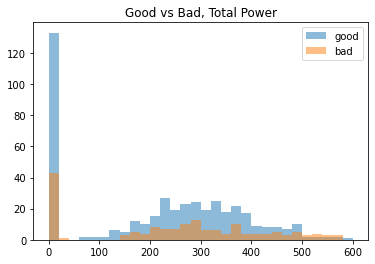

In [63]:
bins = np.linspace(0, 600, 31)
plt.hist(good['Total'], bins, alpha = 0.5, label = 'good')
plt.hist(bad['Total'], bins, alpha = 0.5, label = 'bad')
plt.legend(loc = 'upper right')
plt.title('Good vs Bad, Total Power')
plt.show()

그래프를 확인해본 결과, 0~30 사이에서 good 진영에 Total stat이 매우 낮은 캐릭터들이 보인다. 이들의 합세에 의해 평균 power가 떨어진 현상이 발생했음을 확인할 수 있다. 무능력한(?) 이 사람들의 탓인지는, bins를 조절해서 알아보자.

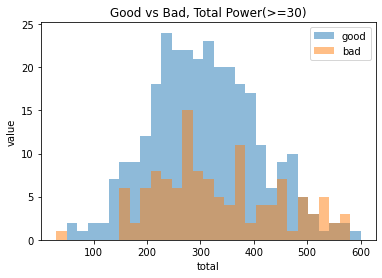

In [70]:
bins = np.linspace(30, 600, 30)
plt.hist(good['Total'], bins, alpha = 0.5, label = 'good')
plt.hist(bad['Total'], bins, alpha = 0.5, label = 'bad')
plt.xlabel('total')
plt.ylabel('value')
plt.legend(loc = 'upper right')
plt.title('Good vs Bad, Total Power(>=30)')
plt.show()

딱봐도 스탯이 일정 값 이상(여기서는 30)인 경우에 한해서는 good측이 bad에 밀리지 않는다. 

스텟이 30 이하인 캐릭터의 비중이 어느정도인지, 수치적으로 확인해보면 다음과 같다.

In [54]:
print('Ratio of weak Good Aligh(power < 30)')
print(len(good.loc[good['Total']<30])/len(good))
print('Ratio of weak Bad Aligh(power < 30)')
print(len(bad.loc[bad['Total']<30])/len(bad))

Ratio of weak Good Aligh(power < 30)
0.30787037037037035
Ratio of weak Bad Aligh(power < 30)
0.2606060606060606


비슷한 그림을 각 스탯별로도 비교해볼 수 있다.

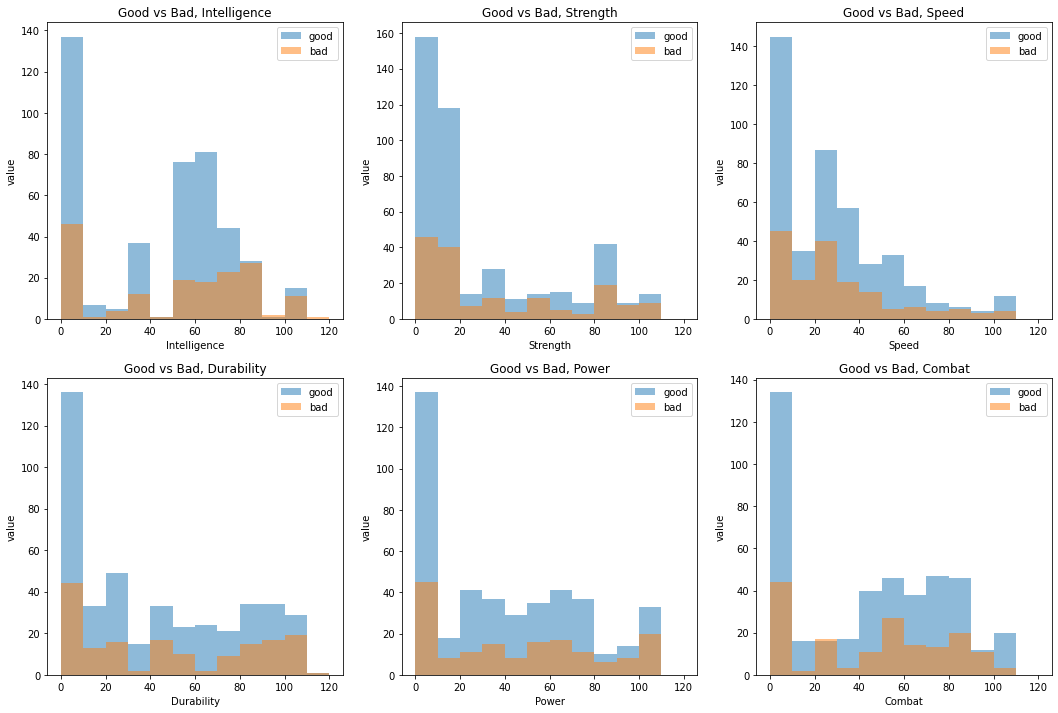

In [76]:
plt.figure(figsize = (18, 12))
bins = np.linspace(0, 120, 13)

plt.subplot(231)
plt.hist(good['Intelligence'], bins, alpha = 0.5, label = 'good')
plt.hist(bad['Intelligence'], bins, alpha = 0.5, label = 'bad')
plt.xlabel('Intelligence')
plt.ylabel('value')
plt.legend(loc = 'upper right')
plt.title('Good vs Bad, Intelligence')

plt.subplot(232)
plt.hist(good['Strength'], bins, alpha = 0.5, label = 'good')
plt.hist(bad['Strength'], bins, alpha = 0.5, label = 'bad')
plt.xlabel('Strength')
plt.ylabel('value')
plt.legend(loc = 'upper right')
plt.title('Good vs Bad, Strength')

plt.subplot(233)
plt.hist(good['Speed'], bins, alpha = 0.5, label = 'good')
plt.hist(bad['Speed'], bins, alpha = 0.5, label = 'bad')
plt.xlabel('Speed')
plt.ylabel('value')
plt.legend(loc = 'upper right')
plt.title('Good vs Bad, Speed')

plt.subplot(234)
plt.hist(good['Durability'], bins, alpha = 0.5, label = 'good')
plt.hist(bad['Durability'], bins, alpha = 0.5, label = 'bad')
plt.xlabel('Durability')
plt.ylabel('value')
plt.legend(loc = 'upper right')
plt.title('Good vs Bad, Durability')

plt.subplot(235)
plt.hist(good['Power'], bins, alpha = 0.5, label = 'good')
plt.hist(bad['Power'], bins, alpha = 0.5, label = 'bad')
plt.xlabel('Power')
plt.ylabel('value')
plt.legend(loc = 'upper right')
plt.title('Good vs Bad, Power')

plt.subplot(236)
plt.hist(good['Combat'], bins, alpha = 0.5, label = 'good')
plt.hist(bad['Combat'], bins, alpha = 0.5, label = 'bad')
plt.xlabel('Combat')
plt.ylabel('value')
plt.legend(loc = 'upper right')
plt.title('Good vs Bad, Combat')

plt.show()

## Bonus 1. 만화사별 비교

아! 아쉽게도 만화사 관련 데이터는 주어진 데이터에 없다. 다행히 과제 링크의 데이터에 다른 데이터가 주어져있어 이를 활용해보자.

In [5]:
infos = pd.read_csv('C:/Users/HP/Desktop/work_on_PG/marvel_characters_info.csv')

In [6]:
infos.tail(5)

,ID,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
729,729,Yellowjacket II,good,Female,blue,Human,Strawberry Blond,Marvel Comics,-,165.0,52.0
730,730,Ymir,good,Male,white,Frost Giant,No Hair,Marvel Comics,white,304.8,-99.0
731,731,Yoda,good,Male,brown,Yoda's species,White,George Lucas,green,66.0,17.0
732,732,Zatanna,good,Female,blue,Human,Black,DC Comics,-,170.0,57.0
733,733,Zoom,bad,Male,red,-,Brown,DC Comics,-,185.0,81.0


In [7]:
chars.tail(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292
610,Zoom,bad,50,10,100,28,72,28,288


난관이 생겼다. 그냥은 합칠수가 없다. 심지어 info에는 Yoda가 있는데, 오늘의 스탯 데이터엔 요다가 없다...
하지만 우리는 chars를 메인으로 기준으로 데이터를 합쳐야 한다.

In [8]:
# 그 전에 info에서 쓸 데이터만 추리기
infos = infos[['Name', 'Gender', 'Publisher', 'Height', 'Weight', 'Race']]

In [9]:
merged_chars = pd.merge(chars, infos, how='inner', on = 'Name')

In [10]:
merged_chars

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Gender,Publisher,Height,Weight,Race
0,A-Bomb,good,38,100,17,80,17,64,316,Male,Marvel Comics,203.0,441.0,Human
1,Abe Sapien,good,88,14,35,42,35,85,299,Male,Dark Horse Comics,191.0,65.0,Icthyo Sapien
2,Abin Sur,good,50,90,53,64,84,65,406,Male,DC Comics,185.0,90.0,Ungaran
3,Abomination,bad,63,80,53,90,55,95,436,Male,Marvel Comics,203.0,441.0,Human / Radiation
4,Abraxas,bad,88,100,83,99,100,56,526,Male,Marvel Comics,-99.0,-99.0,Cosmic Entity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Yellowjacket,good,88,10,12,28,12,14,164,Male,Marvel Comics,183.0,83.0,Human
596,Yellowjacket II,good,50,10,35,28,31,28,182,Female,Marvel Comics,165.0,52.0,Human
597,Ymir,good,50,100,27,100,83,28,388,Male,Marvel Comics,304.8,-99.0,Frost Giant
598,Zatanna,good,75,10,23,28,100,56,292,Female,DC Comics,170.0,57.0,Human


inner join 을 활용할 경우 Name이 둘 다에게 들어간 데이터에 대해서만 합치게 된다. 

In [11]:
merged_chars.isna().sum()

Name            0
Alignment       0
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
Gender          0
Publisher       7
Height          0
Weight          0
Race            0
dtype: int64

결측치는 존재하나, 어차피 알 수 없는 캐릭터에 대해서 Publisher를 확인하는 것은 의미가 없으므로 결측치를 무시하고 평균을 계산해도 무방하다. 어차피, groupby에서 잡히지 않는다.

In [12]:
merged_chars['Total'].groupby(by = merged_chars['Publisher']).mean()

Publisher
ABC Studios          166.000000
DC Comics            253.436047
Dark Horse Comics    196.875000
Hanna-Barbera          5.000000
HarperCollins          5.000000
Icon Comics          148.000000
Image Comics          70.615385
Marvel Comics        243.851003
Microsoft            425.000000
NBC - Heroes         140.526316
Shueisha             481.500000
Sony Pictures        398.000000
SyFy                 188.800000
Team Epic TV           5.000000
Universal Studios    237.000000
Wildstorm              5.000000
Name: Total, dtype: float64

Shueisha 사 캐릭터의 Total 능력치 평균이 가장 높다. 어떤 캐릭터들이 영광의 주인공(?) 인지 확인해보자

In [13]:
merged_chars.loc[merged_chars['Publisher'] == 'Shueisha']

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Gender,Publisher,Height,Weight,Race
246,Goku,good,56,100,75,90,100,100,521,Male,Shueisha,175.0,62.0,Saiyan
399,Naruto Uzumaki,good,50,80,32,80,100,100,442,Male,Shueisha,168.0,54.0,Human


단 두개지만, 상당히 강한 캐릭터들을 만든 것으로 보인다. ~~그 와중 나루토가 보인다.~~

## Additional 1. Male vs Female

In [14]:
merged_chars.groupby(by = merged_chars['Gender']).mean()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Height,Weight
Gender,,,,,,,,,
-,27.250000,18.375000,18.500000,26.208333,17.625000,22.791667,130.750000,64.916667,33.791667
Female,42.206250,24.125000,24.231250,34.993750,37.825000,40.325000,203.706250,104.028125,33.393750
Male,47.762019,32.913462,29.939904,47.060096,43.725962,46.406250,247.807692,108.542067,57.730769


대체로 Male Characters들이 Female Character보다 스텟면에서 전체적으로 다 높은것을 확인할 수 있다.

## Additional 2. Height, Weight의 관계

위의 데이터를 보니까 -99가 보인다. -99라는 키는 없고, -99라는 weight는 없다.
컨셉에 따라 음수의 값을 가지는 경우가 있다고 하여 우선은 결측치로 처리해보자.

In [19]:
for i in range(0, 600):
    if merged_chars['Height'][i] == -99:
        merged_chars['Height'][i] = np.nan
    if merged_chars['Weight'][i] == -99:
        merged_chars['Weight'][i] = np.nan

<ipython-input-19-ff52b9e22415>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_chars['Height'][i] = np.nan
<ipython-input-19-ff52b9e22415>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_chars['Weight'][i] = np.nan


In [20]:
merged_chars.isna().sum()

Name              0
Alignment         0
Intelligence      0
Strength          0
Speed             0
Durability        0
Power             0
Combat            0
Total             0
Gender            0
Publisher         7
Height          172
Weight          180
Race              0
dtype: int64

종족에 따라, 키/몸무게의 성향이 다를것 같기에, 일단 종족에 대해 정리해보자.

In [21]:
merged_chars['Race'].unique()

array(['Human', 'Icthyo Sapien', 'Ungaran', 'Human / Radiation',
       'Cosmic Entity', '-', 'Android', 'Vampire', 'God / Eternal',
       'Symbiote', 'Mutant', 'Atlantean', 'Neyaphem', 'New God', 'Alpha',
       'Bizarro', 'Inhuman', 'Demon', 'Alien', 'Human-Kree', 'Cyborg',
       'Amazon', 'Human / Cosmic', 'Kryptonian', 'Kakarantharaian',
       'Saiyan', 'Flora Colossus', 'Human-Vuldarian', 'Demi-God',
       'Eternal', 'Metahuman', 'Bolovaxian', 'Czarnian', 'Asgardian',
       'Martian', 'Human / Altered', 'Planet', 'Animal', 'Clone',
       'Korugaran', 'Zombie', 'Tamaranean', 'Frost Giant',
       'Mutant / Clone'], dtype=object)

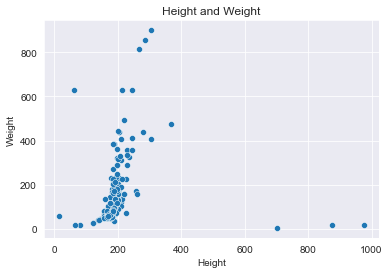

In [24]:
sns.set_style('darkgrid')
sns.scatterplot(data = merged_chars, x = 'Height', y = 'Weight')
plt.title('Height and Weight')
plt.show()

일단, 전체적인 산점도를 확인해 본 결과 Height족에서 Outlier가 보여 나머지 분포를 확인하기엔 어렵다.   
각 축의 값을 한정시켜보자. 
(반복이어서 유사한 과정은 생략합니다.)  
150 < x < 250, y < 600으로 한정한다.

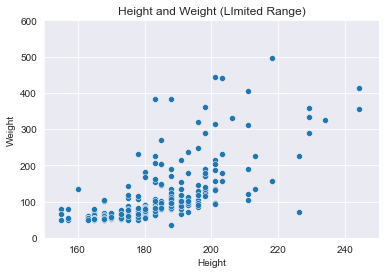

In [27]:
sns.set_style('darkgrid')
sns.scatterplot(data = merged_chars, x = 'Height', y = 'Weight')
plt.xlim(150,250)
plt.ylim(0, 600)
plt.title('Height and Weight (LImited Range)')
plt.show()

특정 구간에 쏠려있는것은 사실이나, 그래도 전체적으로 키가 커질수록, 무게가 늘어나는 경향성을 보여주고 있다.

그럼, 키/몸무게와 스탯 또한 연관성이 있는지 보려한다. 이 역시 위의 한정된 구간에서만 경향성을 보려고 한다.

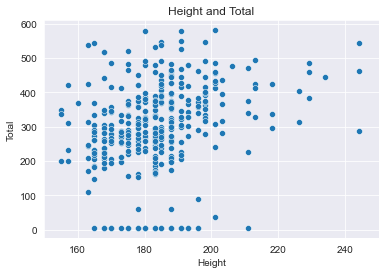

In [28]:
sns.set_style('darkgrid')
sns.scatterplot(data = merged_chars, x = 'Height', y = 'Total')
plt.xlim(150,250)
plt.title('Height and Total')
plt.show()

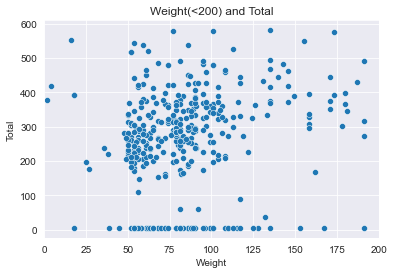

In [31]:
sns.set_style('darkgrid')
sns.scatterplot(data = merged_chars, x = 'Weight', y = 'Total')
plt.xlim(0,200)
plt.title('Weight(<200) and Total')
plt.show()

역시 이 또한, 특별한 차이점을 느끼긴 어렵다.

## Additional 3. 스탯과 관련된 부가 질문들

### 질문 1. Strength와 Power는 차이가 없어보이는데..? 두개의 상관관계는?

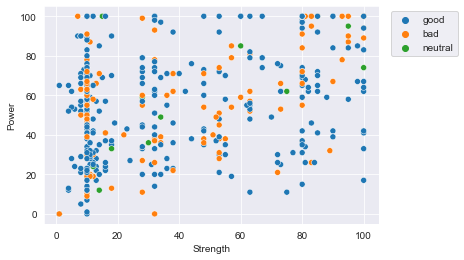

In [18]:
# 원 데이터인 chars 사용
sns.set_style('darkgrid')
sns.scatterplot(data = chars, x = 'Strength', y = 'Power', hue = 'Alignment')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.25, 1.0))
plt.show()

그림을 통해 알 수 있는 것은 별 상관관계가 없음을 알 수 있다.

### 질문 2. 그렇다면, Strengh와 Power중에 어느게 더 Combat과 연관성이 있는가?

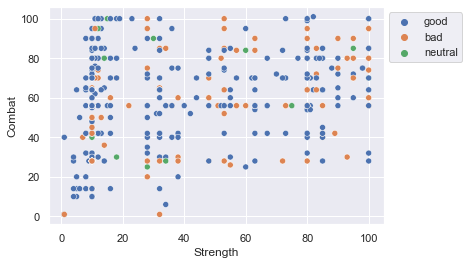

In [112]:
sns.set_style('darkgrid')
sns.scatterplot(data = chars, x = 'Strength', y = 'Combat', hue = 'Alignment')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.25, 1.0))
plt.show()

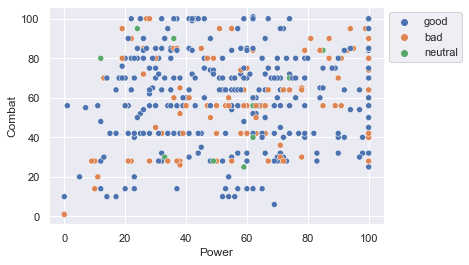

In [113]:
sns.set_style('darkgrid')
sns.scatterplot(data = chars, x = 'Power', y = 'Combat', hue = 'Alignment')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.25, 1.0))
plt.show()

이 또한 두 스탯 모두 combat과 크게 연관이 없음을 알 수 있다.

### 질문 3. 종족에 따른 Total Stat 표시

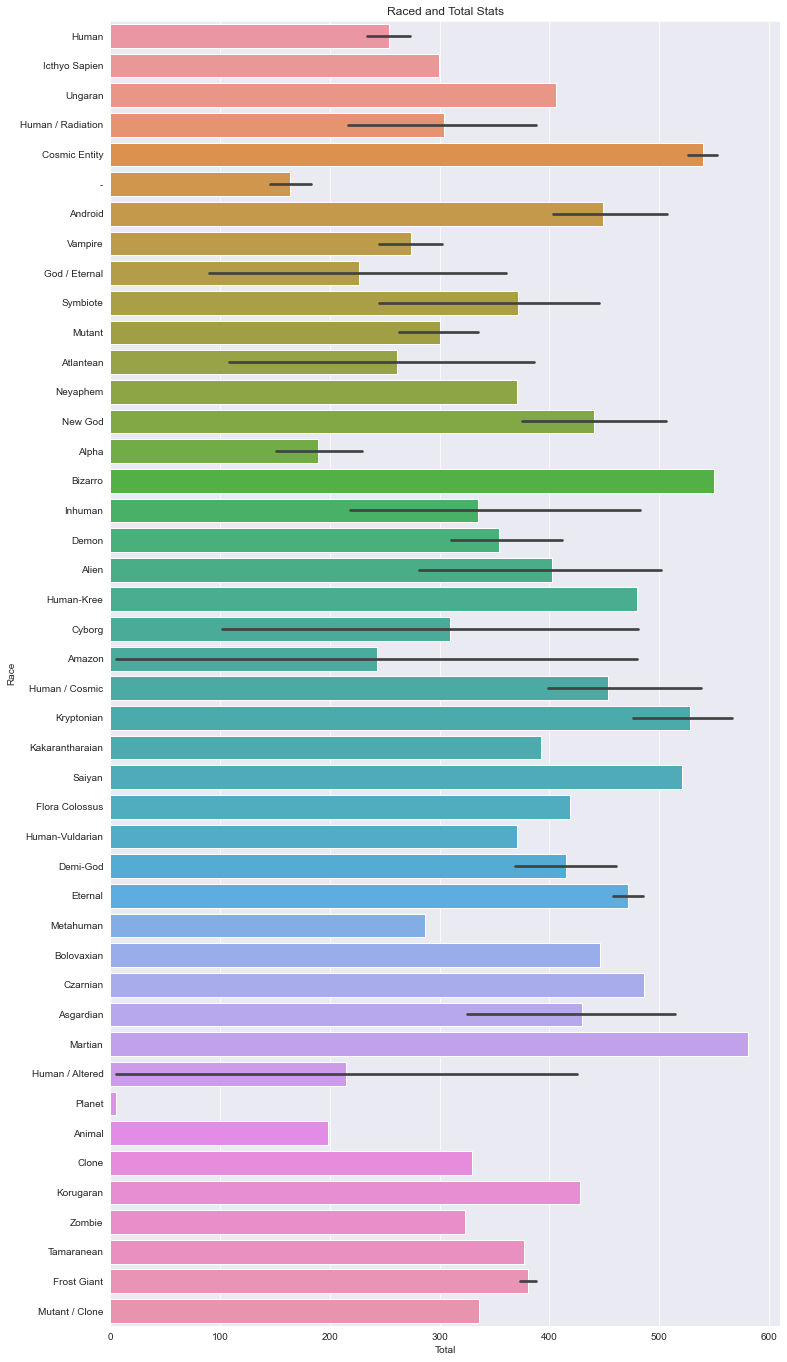

In [35]:
# 종족정보가 있는 merged_사용
plt.figure(figsize = (12, 24))
sns.barplot(x = 'Total', y = 'Race', data = merged_chars)
plt.title('Raced and Total Stats')
plt.show()